In [1]:
import numpy as np
import time
from DataProcess import *
import matplotlib.pyplot as plt

/home/guanlunlu/.local/lib/python3.10/site-packages/dill/_dill.py:970: UnpicklingWarning: Creating a new PyCapsule None for a C data structure that may not be present in memory. Segmentation faults or other memory errors are possible.
  warnings.warn('Creating a new PyCapsule %s for a C data structure that may not be present in memory. Segmentation faults or other memory errors are possible.' % (name,), UnpicklingWarning)
/home/guanlunlu/.local/lib/python3.10/site-packages/dill/_dill.py:970: UnpicklingWarning: Creating a new PyCapsule None for a C data structure that may not be present in memory. Segmentation faults or other memory errors are possible.
  warnings.warn('Creating a new PyCapsule %s for a C data structure that may not be present in memory. Segmentation faults or other memory errors are possible.' % (name,), UnpicklingWarning)


In [2]:
sbrio_filepath = "../exp_data/20230718/1/sbrio.csv"
vicon_filepath = "../exp_data/20230718/1/vicon.csv"
orin_filepath = "../exp_data/20230718/1/orin.csv"

expdata = ExperimentData(sbrio_filepath, vicon_filepath, orin_filepath)
expdata.importViconData()
expdata.importSbrioData()
expdata.importImuData()
expdata.alignData()

Vicon Data Read From:  ../exp_data/20230718/1/vicon.csv
Trimmed Size:  13575
Import SBRIO Data ...
--
vicon tspan:  5.8100000000000005 27.150000000000002
vicon triggered data length:  10671
--
sbrio tspan:  104.261 138.832
sbrio triggered data length:  34572
--
imu tspan:  42.18139982223511 84.49646997451782
imu triggered data length:  40233
--
Aligned Data tspan:  0.0 21.34
Aligned Data length:  21341


In [3]:
t = time.time()
threads = []

for i in range(4):
    threads.append(threading.Thread(target=iterFtip,
                    args=(expdata.aligned_full_data, i)))
    threads[i].start()

for i in range(4):
    threads[i].join()

print("Elapsed: ", time.time() - t)

Elapsed:  204.8395459651947


In [4]:
# Save Results of Virtual Work Method (by Numerical Diff. Jacobian) F_tip
'''
import dill
file = "./serialized_object/Ftip_iterated_expdata_1.pkl"
with open(file, 'wb') as d:
    dill.dump(expdata, d)
'''

'\nimport dill\nfile = "./serialized_object/Ftip_iterated_expdata_1.pkl"\nwith open(file, \'wb\') as d:\n    dill.dump(expdata, d)\n'

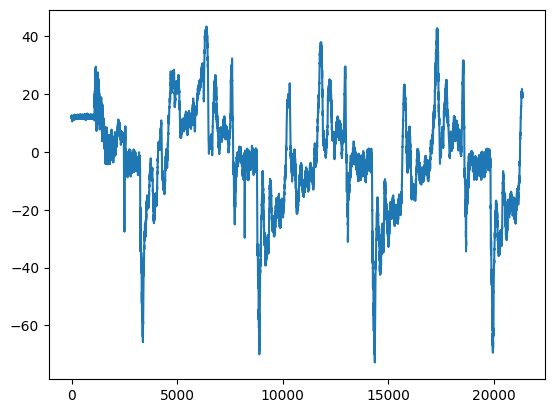

In [4]:
import matplotlib.pyplot as plt

# print(expdata.aligned_full_data[0][1][0].F_tip)

A_F = []
for i in range(len(expdata.aligned_full_data)):
    # print("t: ",expdata.aligned_full_data[i][0])
    # print(expdata.aligned_full_data[i][1][0].Motor_R.rpy_pos)
    A_F.append(expdata.aligned_full_data[i][1][3].F_tip[0,0])

plt.plot(A_F)
plt.show()

In [5]:
# Iteration
iterate_frequency = 100
iterate_dt = 1/iterate_frequency
iterate_horizon = 
